In [2]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val*180/np.pi

def initialize(planets, resonances):
    t, e, P, pomega, longitude, Pratio, phi1, phi2 = {}, {}, {}, {}, {}, {}, {}, {}

    for label in planets:
        t[label] = []
        e[label] = []
        P[label] = []
        pomega[label] = []
        longitude[label] = []

    for pair in resonances.keys():
        t[pair] = []
        Pratio[pair] = []
        phi1[pair] = []
        phi2[pair] = []
        
    return t, e, P, pomega, longitude, Pratio, phi1, phi2

def output(sim,planets,resonances,t,e,P,pomega,longitude,Pratio,phi1,phi2):
    ps = sim.particles
    for p in planets:
        try:
            e[p].append(ps[p].e)
            P[p].append(ps[p].P)
            pomega[p].append(ps[p].pomega)
            longitude[p].append(ps[p].l)  
            t[p].append(sim.t)
        except:
            pass
    for resonance in resonances.items():
        pair = resonance[0]
        p1 = pair[0]
        p2 = pair[1]
        try:
            Pratio[pair].append(ps[p2].P/ps[p1].P)
            t[pair].append(sim.t)
            if resonance[1] is not None:
                res = resonance[1]
                p = res[1]
                q = res[0]-res[1]
                phi1[pair].append(wrap((p+q)*ps[p2].l - p*ps[p1].l - q*ps[p2].pomega))
                phi2[pair].append(wrap((p+q)*ps[p2].l - p*ps[p1].l - q*ps[p1].pomega))
        except:
            pass
        
def plotsa(sa,planets, resonances):
    Nout = len(sa)
    N = sa[0].N
    t, e, P, pomega, longitude, Pratio, phi1, phi2 = initialize(planets, resonances)
        
    for i,sim in enumerate(sa):
        output(sim,planets,resonances,t,e,P,pomega,longitude,Pratio,phi1,phi2)
        
    fig, axarr = plt.subplots(ncols=2, nrows=3, figsize=(18,10))
    for p in planets:
        axarr[0,0].plot(t[p], P[p], '.', label=p)
        axarr[0,1].plot(t[p], e[p], '.', label=p)
    for resonance in resonances.items():
        pair = resonance[0]
        res = resonance[1]
        axarr[1,0].plot(t[pair], Pratio[pair], '.', label=pair)
        if res is not None:
            resratio = res[0]/res[1]
            axarr[1,1].plot(t[pair], np.array(Pratio[pair])-resratio, '.', label=pair)
            axarr[2,0].plot(t[pair], phi1[pair], '.', label=pair)
            axarr[2,1].plot(t[pair], phi2[pair], '.', label=pair)
            axarr[2,0].set_ylim([0.,360])
            axarr[2,1].set_ylim([0.,360])
    for ax in axarr.flatten():
        ax.legend(loc='upper right')
    return fig

def integrate(sim, T, t, e, P, pomega, longitude, Pratio, phi1, phi2, planets, resonances):
    Nout = 1000
    T0 = sim.t
    times = np.linspace(T0, T0+T, Nout)
    ps = sim.particles
    for i, time in enumerate(times):
        sim.integrate(time)
        output(sim,planets,resonances,t,e,P,pomega,longitude,Pratio,phi1,phi2)
        
def plot(t,P,e,Pratio,phi1,phi2,planets,resonances):
    fig, axarr = plt.subplots(ncols=2, nrows=3, figsize=(18,10))
    for p in planets:
        axarr[0,0].plot(t[p], P[p], '.', label=p)
        axarr[0,1].plot(t[p], e[p], '.', label=p)
    for resonance in resonances.items():
        pair = resonance[0]
        res = resonance[1]
        axarr[1,0].plot(t[pair], Pratio[pair], '.', label=pair)
        if res is not None:
            resratio = res[0]/res[1]
            axarr[1,1].plot(t[pair], np.array(Pratio[pair])-resratio, '.', label=pair)
            axarr[2,0].plot(t[pair], phi1[pair], '.', label=pair)
            axarr[2,1].plot(t[pair], phi2[pair], '.', label=pair)
            axarr[2,0].set_ylim([0.,360])
            axarr[2,1].set_ylim([0.,360])
    for ax in axarr.flatten():
        ax.legend(loc='upper right')
    return fig

In [3]:
from collections import OrderedDict
planets = ['b', 'c', 'd', 'e', 'f', 'g']
resonances = OrderedDict([(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3))]) # ordered so we add planets in right sequence

IC3K1.2636e+02mag4.9148e-02.bin


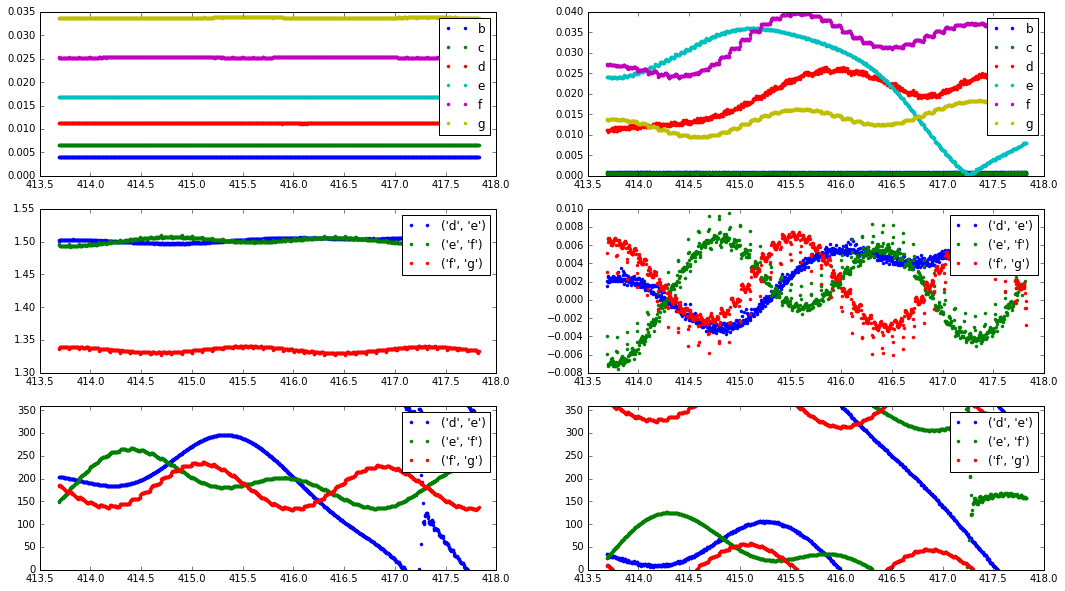

In [44]:
simID=3
import os
for filename in os.listdir('data/'):
    if filename.startswith("IC{0}K".format(simID)):
        print(filename)
        sa = rebound.SimulationArchive('data/'+filename)

sim = sa[0]
t, e, P, pomega, longitude, Pratio, phi1, phi2 = initialize(planets, resonances)
  
integrate(sim, 1.e3*sim.particles[1].P, t, e, P, pomega, longitude, Pratio, phi1, phi2, planets, resonances)
plot(t,P,e,Pratio,phi1,phi2,planets,resonances);

In [39]:
simID=6
import os
for filename in os.listdir('data/'):
    if filename.startswith("IC{0}K".format(simID)):
        path = 'data/'+filename
        sim = rebound.Simulation.from_archive(path)
        sim.simulationarchive_filename = path.encode('ascii')

sim.t

9413.689392162916

In [28]:
sim.integrate(3.2e3)

In [15]:
'data/'+filename

'data/6resrebx1.00e+08.bin'